<a href="https://colab.research.google.com/github/Cindyyyhey/CSC373_data_mining/blob/main/chapter3_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting1
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data preprocessing

In [ ]:
data_Original = pd.read_csv("BreastCancerData.csv")
data_Original.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# create a subset
data = data_Original.iloc[:, [1,2,3,4,5,6,7,8,9,10,11]]
list(data.columns)

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [ ]:
nRow, nCol = data.shape
print('There are %d rows and %d columns' % (nRow,nCol))

There are 569 rows and 11 columns


In [ ]:
# count the two level values for class
print(data['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


In [ ]:
# check if there is any null data for each column
pd.isnull(data).sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [ ]:
data = data.dropna(axis=1)

Text(0.5, 1.0, 'Bar plot of Diagnosis')

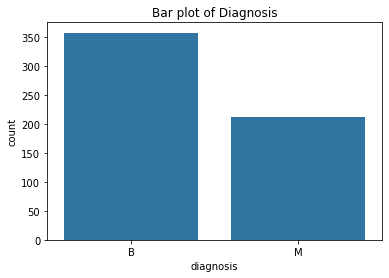

In [ ]:
base_color = sns.color_palette()[0]
cat_order = data['diagnosis'].value_counts().index
sns.countplot(data = data, x = 'diagnosis', color = base_color, order = cat_order).set_title('Bar plot of Diagnosis')

# Load packages for decision tree

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Change response variable to number because the sklearn does not support string for response variable
### B=1 and M=-1

In [ ]:
# select y(class)
y = data["diagnosis"]
y = np.where(y == 'B', 1, -1)

# extract X
X = data.drop('diagnosis', 1)

### Split dataset into training set and test set (70% for trainging and 30% for testing)

In [ ]:
# Split dataset into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Build a simple decision tree classifier using all default parameters

In [ ]:
# Create Decision Tree classifer object
clf_simple = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf_simple.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_simple.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9239766081871345


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 54,   9],
       [  4, 104]])

In [ ]:
# a nicer way to visualize the confusion matrix
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
display(df_confusion)

Predicted,-1,1
Actual,,
-1,54,9
1,4,104


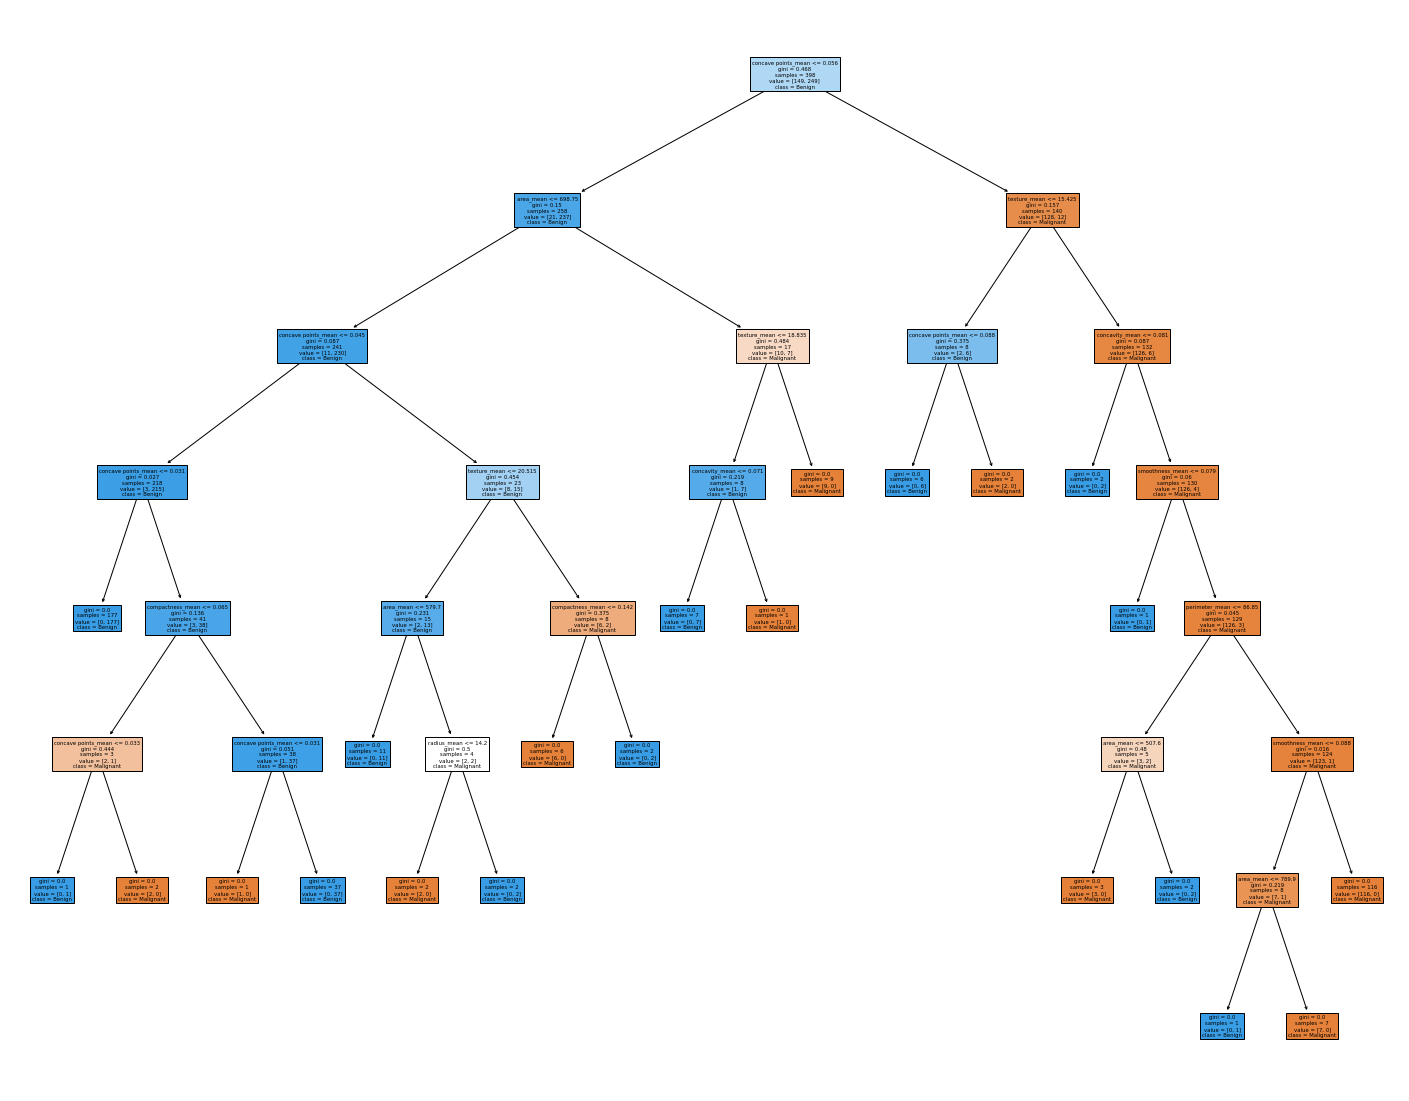

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(clf_simple, 
                   feature_names=X.columns,  
                   class_names=["Malignant","Benign"],
                   filled=True)

In [ ]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

## Build a user-defined decision tree with customized parameters

In [ ]:
crit = input("Which criterion do you want to use? (gini or entropy)")
max_d = int(input("What is the max depth do you want for your decision tree?"))
min_s = int(input("What is the number of samples required to split an internal node do you want"))

Which criterion do you want to use? (gini or entropy)gini
What is the max depth do you want for your decision tree?5
What is the number of samples required to split an internal node do you want5


In [ ]:
# Create Decision Tree classifer object
clf_user = DecisionTreeClassifier(criterion = crit,
                                 max_depth = max_d,
                                 min_samples_split = min_s)

# Train Decision Tree Classifer
clf = clf_user.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_user.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9064327485380117


In [ ]:
#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 54,   9],
       [  7, 101]])

In [ ]:
# a nicer way to visualize the confusion matrix
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
display(df_confusion)

Predicted,-1,1
Actual,,
-1,54,9
1,7,101


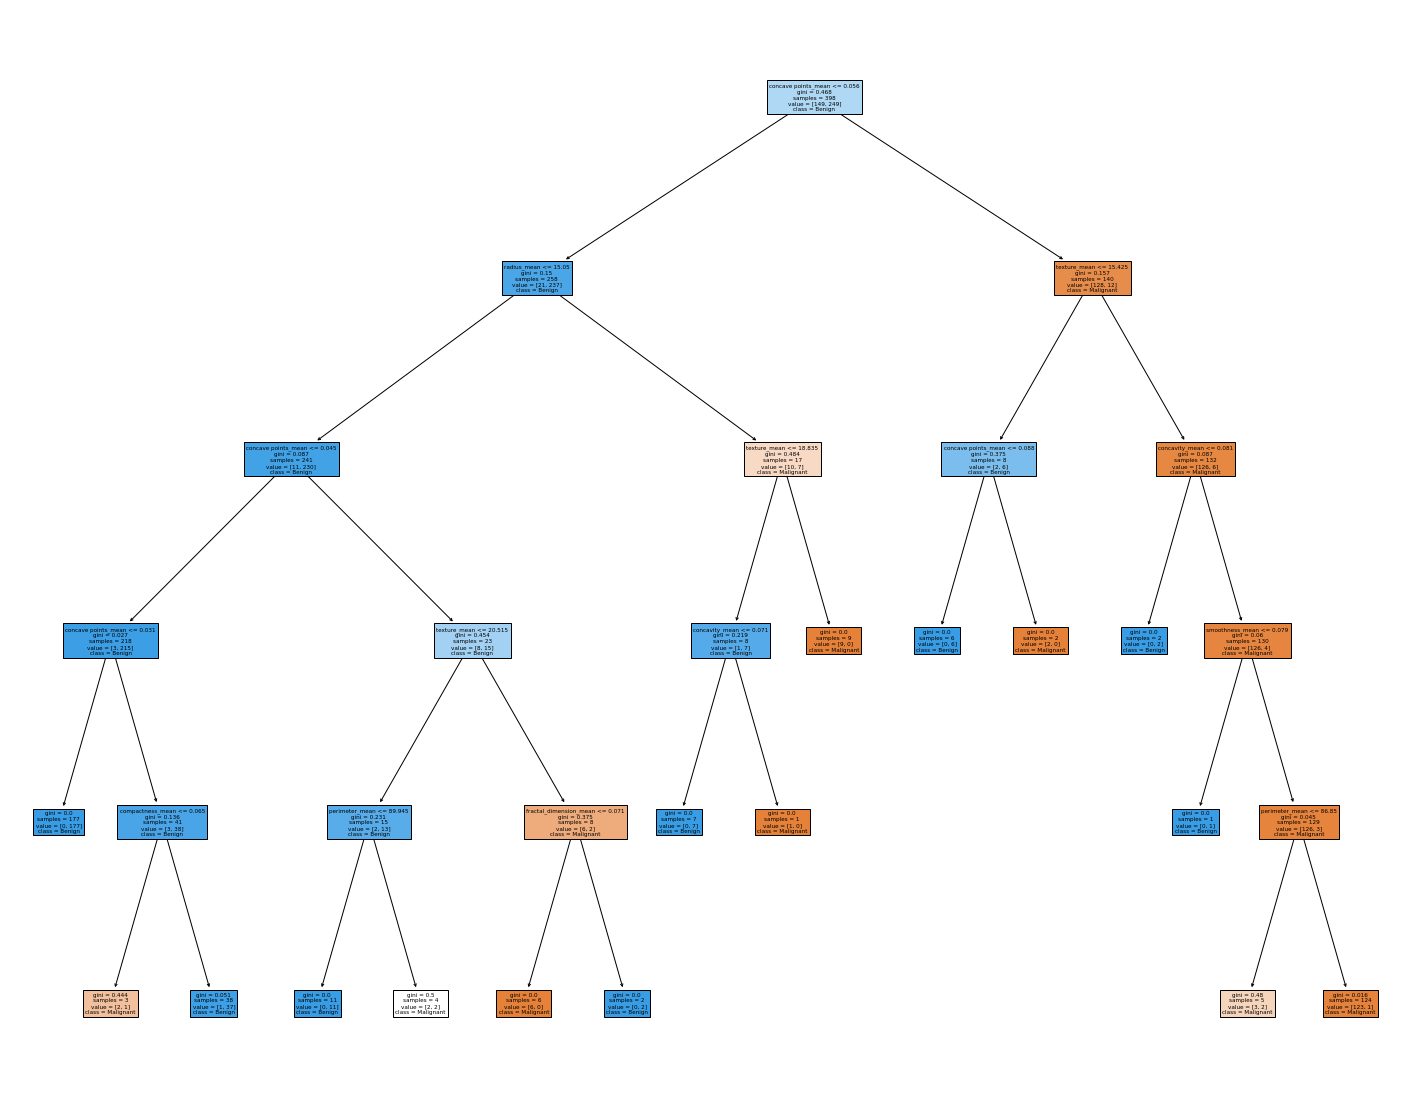

In [ ]:
fig = plt.figure(figsize=(25,20))
b = tree.plot_tree(clf_user, 
                   feature_names=X.columns,  
                   class_names=["Malignant","Benign"],
                   filled=True)

In [ ]:
# create list for different K-fold
max_depth = [1,2,3,4,5,6]
acc_list = []

In [ ]:
for max_d in max_depth:
    # Create Decision Tree classifer object
    clf_user = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = max_d,
                                 min_samples_split = 5)

    # Train Decision Tree Classifer
    clf = clf_user.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf_user.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    acc_list.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9064327485380117
Accuracy: 0.9181286549707602
Accuracy: 0.9239766081871345
Accuracy: 0.9298245614035088
Accuracy: 0.9005847953216374
Accuracy: 0.8947368421052632


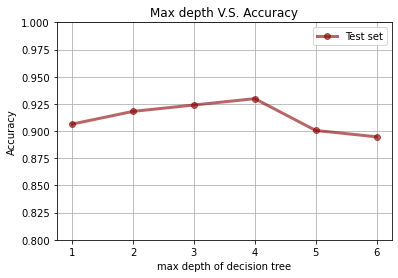

In [ ]:
# plot the several different values of “K” v.s. accuracy of the predictions of the digits
plt.plot(max_depth,acc_list, 'bo-', label='Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('max depth of decision tree')
plt.ylabel('Accuracy')
plt.title('Max depth V.S. Accuracy')
plt.legend(loc='best')
plt.ylim([0.80, 1]) # set the range of Y in order to see the detailed change
plt.grid()
plt.show()

# According to the plot, we believe max depth = 4 is the best choice

In [ ]:
# create list for different K-fold
min_split = [2,3,4,5,6,7,8]
acc_list = []

In [ ]:
for min_s in min_split:
    # Create Decision Tree classifer object
    clf_user = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = 4,
                                 min_samples_split = min_s)

    # Train Decision Tree Classifer
    clf = clf_user.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf_user.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    acc_list.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9122807017543859
Accuracy: 0.9122807017543859
Accuracy: 0.9239766081871345
Accuracy: 0.9122807017543859
Accuracy: 0.9122807017543859
Accuracy: 0.9181286549707602
Accuracy: 0.9239766081871345


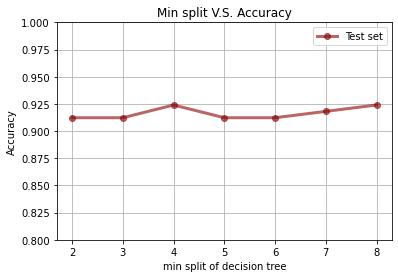

In [ ]:
# plot the several different values of “K” v.s. accuracy of the predictions of the digits
plt.plot(min_split,acc_list, 'bo-', label='Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('min split of decision tree')
plt.ylabel('Accuracy')
plt.title('Min split V.S. Accuracy')
plt.legend(loc='best')
plt.ylim([0.80, 1]) # set the range of Y in order to see the detailed change
plt.grid()
plt.show()

# Putting together max depth = 4 and min split = 4

In [ ]:
# Create Decision Tree classifer object
clf_user = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = 4,
                                 min_samples_split = 4)

# Train Decision Tree Classifer
clf = clf_user.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_user.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    

Accuracy: 0.9239766081871345


# Load packages for KNN

## Feature scaling
## https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 59   4]
 [  4 104]]
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
# a nicer way to visualize the confusion matrix
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
display(df_confusion)

Predicted,-1,1
Actual,,
-1,59,4
1,4,104


## The confusion matrix shows that KNN performs better than decision tree

In [ ]:
# hyperparameter tuning

In [ ]:
# create list for different K-fold
n_neigh = [2,3,4,5,6,7,8]
acc_list = []

In [ ]:
for n in n_neigh:
    # Create Decision Tree classifer object
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = classifier.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    acc_list.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9005847953216374
Accuracy: 0.9532163742690059
Accuracy: 0.9298245614035088
Accuracy: 0.9532163742690059
Accuracy: 0.9298245614035088
Accuracy: 0.935672514619883
Accuracy: 0.9298245614035088


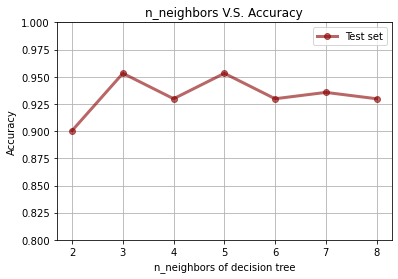

In [ ]:
# plot the several different values of “K” v.s. accuracy of the predictions of the digits
plt.plot(n_neigh,acc_list, 'bo-', label='Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('n_neighbors of decision tree')
plt.ylabel('Accuracy')
plt.title('n_neighbors V.S. Accuracy')
plt.legend(loc='best')
plt.ylim([0.80, 1]) # set the range of Y in order to see the detailed change
plt.grid()
plt.show()